<a href="https://colab.research.google.com/github/AnasMahfudz/DataScienceProject/blob/main/ProjectDigitalSkola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 01 - Analyze Data

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/Valdera/Project-DigitalSkola/main/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [8]:
#Deleting the last 2 columns
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                 'CLIENTNUM'], 
        inplace=True, axis=1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [10]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
numerical_columns = ["Customer_Age", 
                     "Months_on_book", 
                     "Credit_Limit", 
                     "Total_Revolving_Bal", 
                     "Avg_Open_To_Buy", 
                     "Total_Amt_Chng_Q4_Q1", 
                     "Total_Trans_Amt", 
                     "Total_Trans_Ct", 
                     "Total_Ct_Chng_Q4_Q1", 
                     "Avg_Utilization_Ratio"]

categorical_columns = ['Attrition_Flag',
                       'Gender',
                       'Education_Level',
                       'Marital_Status',
                       'Income_Category',
                       'Card_Category']

discrete_columns = ['CLIENTNUM',
                    'Dependent_count',
                    'Total_Relationship_Count',
                    'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon']

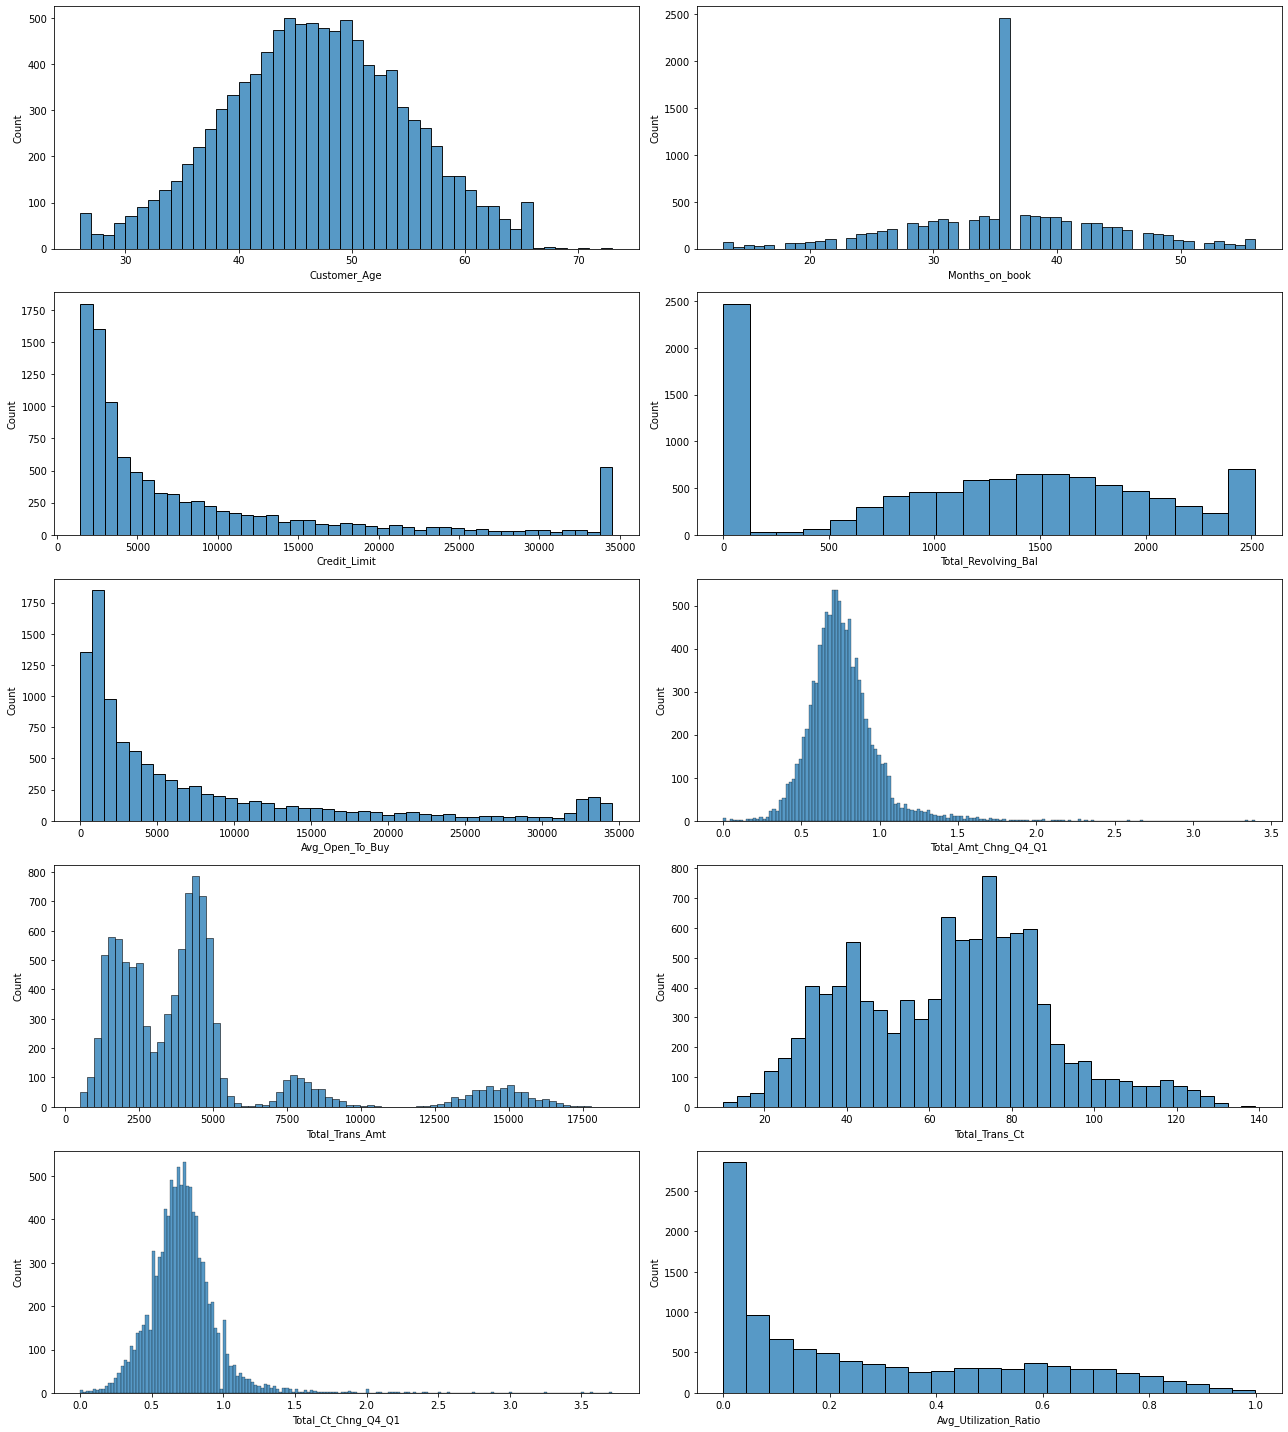

In [12]:
# Numerical Value 
fig, axes = plt.subplots(5,2, figsize=(18,20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(numerical_columns):
  plot = sns.histplot(data=df, x=col, ax=axes[i], fill=True)
plt.tight_layout()

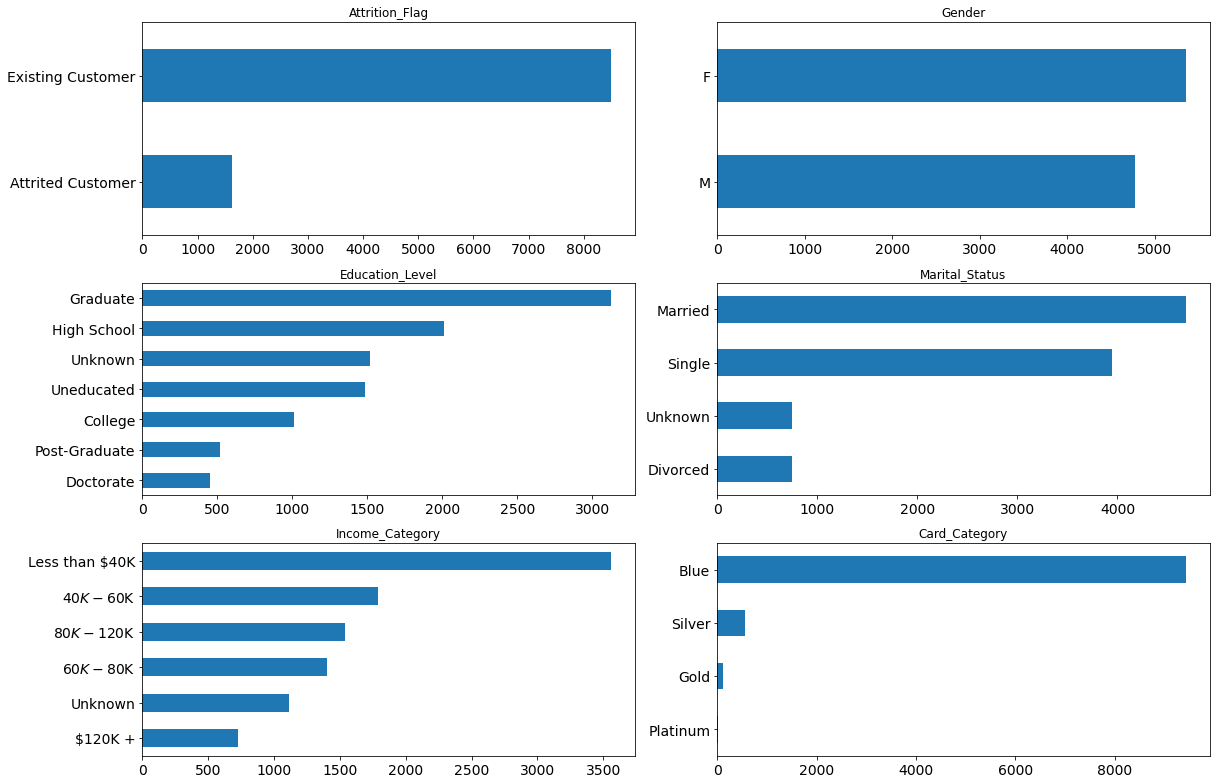

In [13]:


# Categorical Value
fig, axes = plt.subplots(3,2, figsize=(17,11))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(categorical_columns):
  df[col].value_counts()[::-1].plot(kind='barh',ax=axes[i], title=col, fontsize=14)
  axes[i].set_ylabel('')
plt.tight_layout()



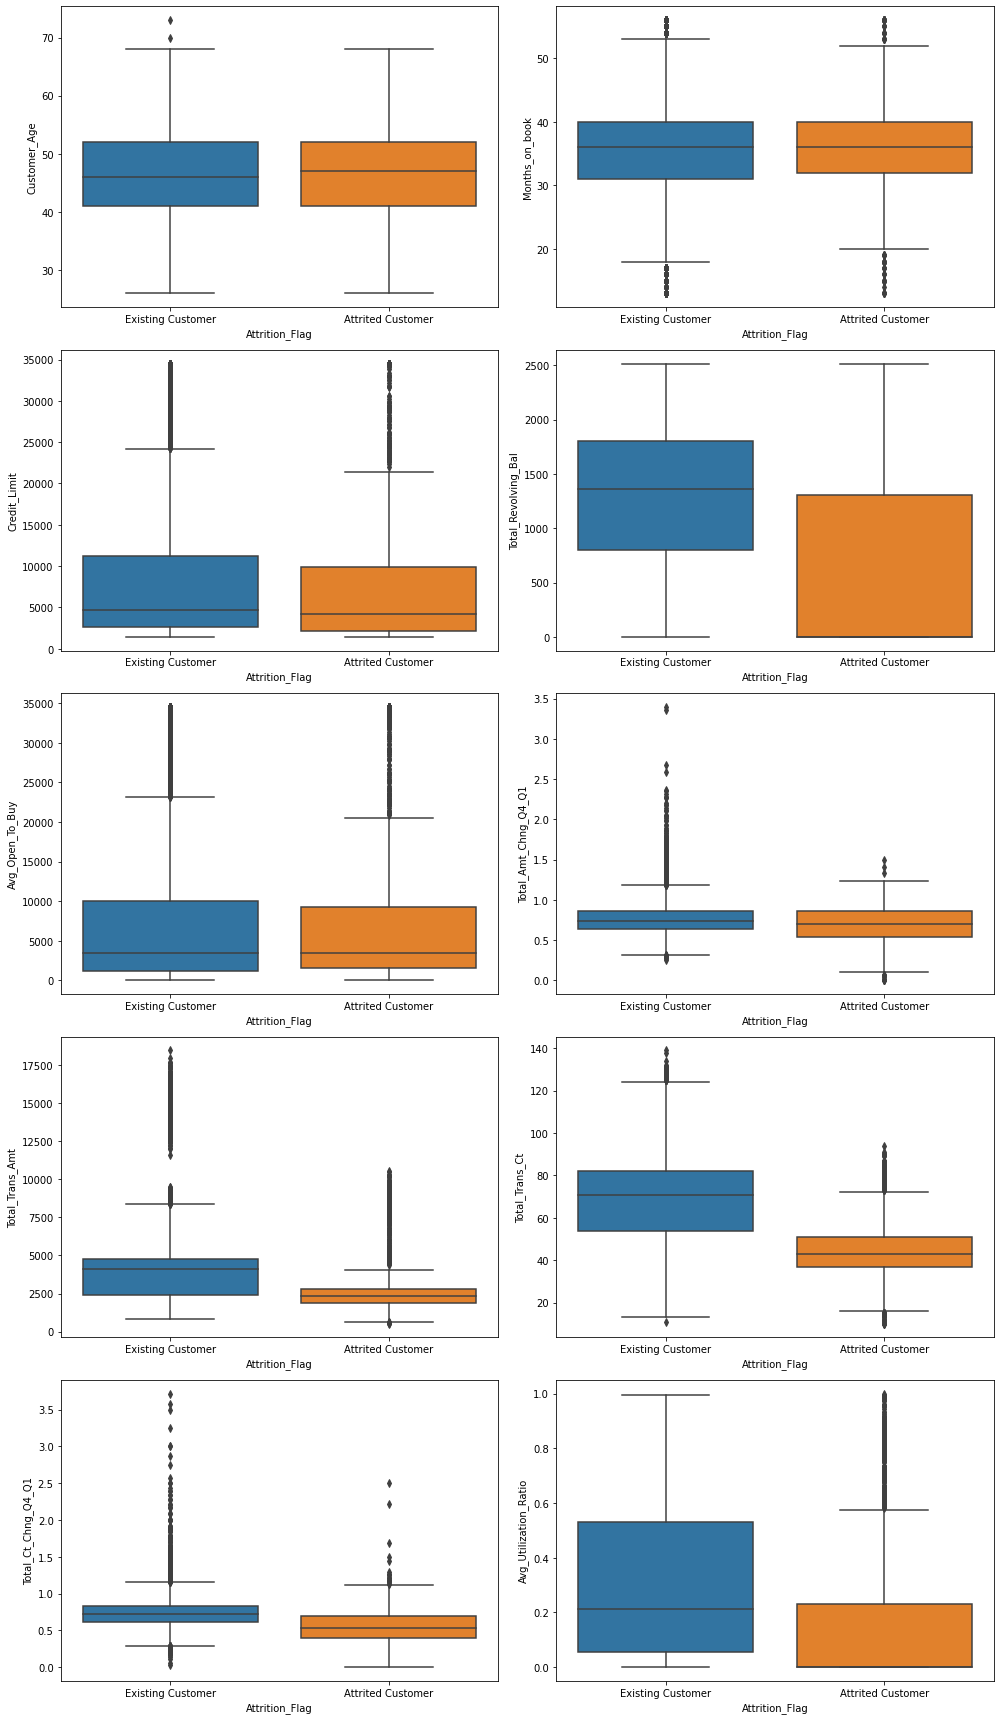

In [14]:
fig, axes = plt.subplots(5,2, figsize=(14,24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(numerical_columns):
    plot = sns.boxplot(data=df, y=col, x='Attrition_Flag', ax=axes[i])
plt.tight_layout()

# 02 - Data Pre Processing

## Label Encoding Target Value

In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df['Attrition_Flag'] = label.fit_transform(df['Attrition_Flag'])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## One Hot Encoding Categorical Value

In [16]:
df = pd.get_dummies(df, prefix_sep='_')
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,1,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,1,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


## Remove Outliers Standard Deviation Method

In [17]:
df['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [18]:
def remove_outliers(df, columns, tresh=3):
    dataset = df.copy()
    index_to_remove = []
    value_to_remove = []
    for col in columns:
        array_to_remove = dataset[col].values
        mean, std = np.mean(array_to_remove), np.std(array_to_remove)
        z_score = np.abs((array_to_remove - mean) / std)
        threshold = tresh
        good = z_score < threshold
        for i in range(len(good)):
            if good[i] == False:
                index_to_remove.append(i)
                value_to_remove.append(array_to_remove[i])
    index_to_remove = np.unique(np.array(index_to_remove))
    print("Removed rows: ", len(index_to_remove))
    dataset = dataset.drop(dataset.index[index_to_remove])
    return dataset

In [19]:
df = remove_outliers(df, numerical_columns)

Removed rows:  642


In [20]:
df['Attrition_Flag'].value_counts()

1    7876
0    1609
Name: Attrition_Flag, dtype: int64

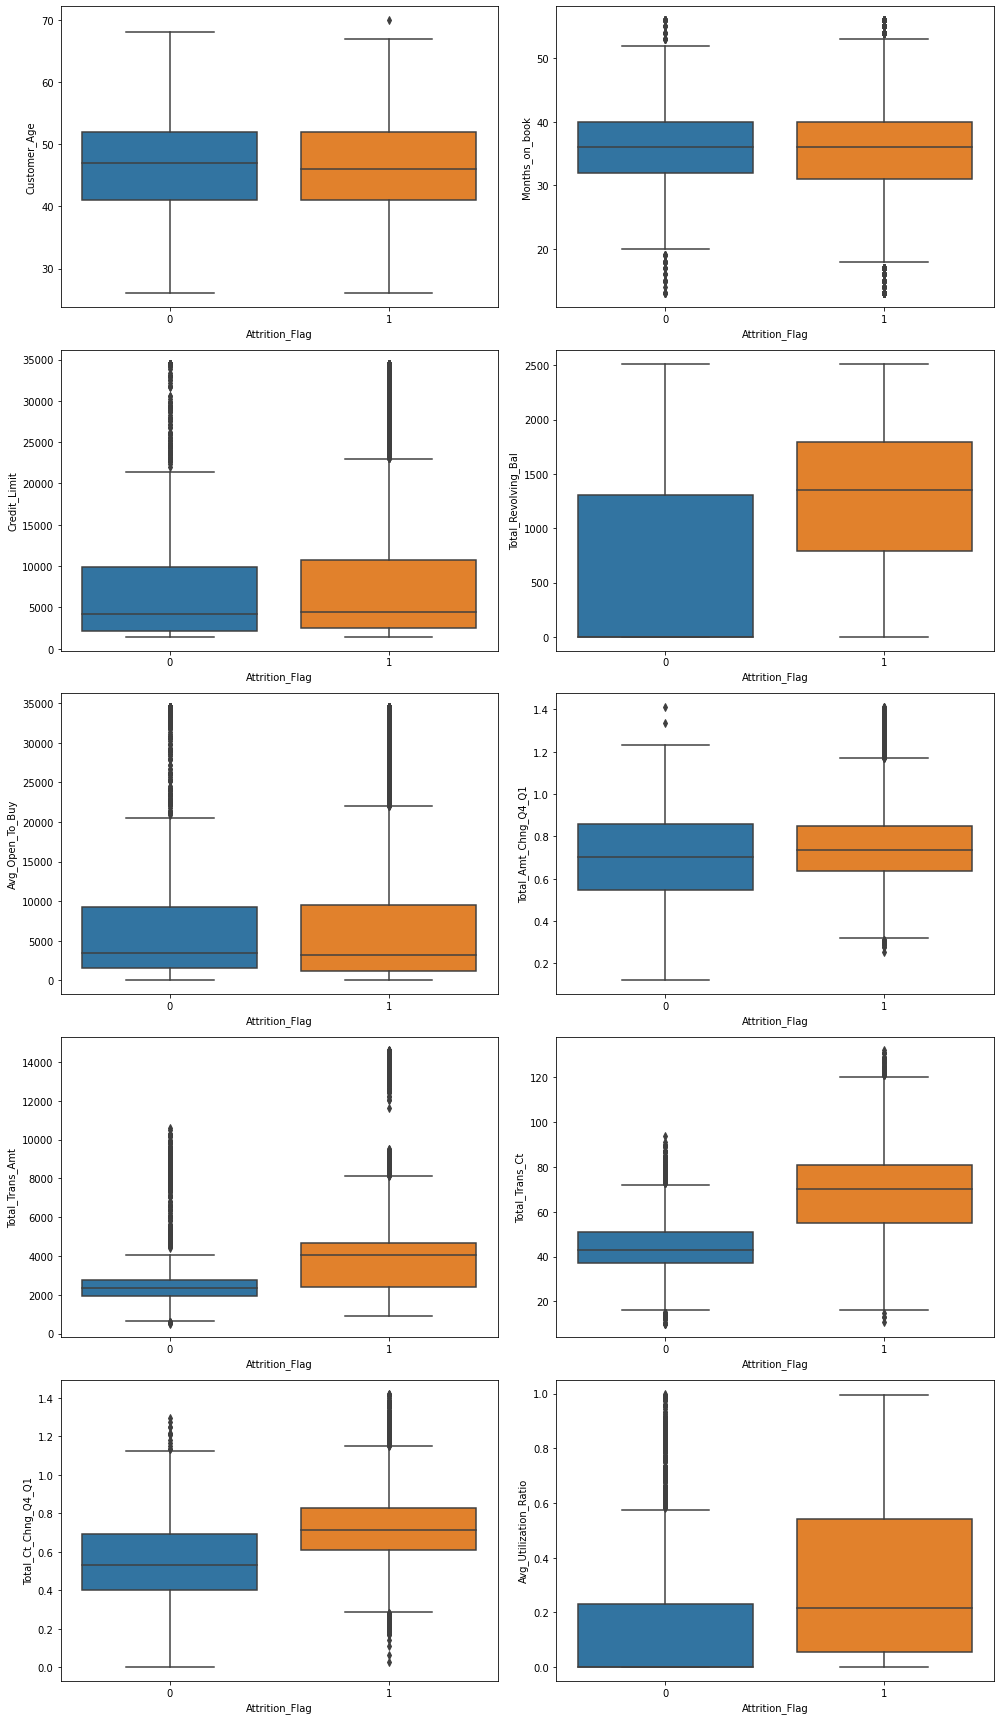

In [21]:
fig, axes = plt.subplots(5,2, figsize=(14,24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(numerical_columns):
    plot = sns.boxplot(data=df, y=col, x='Attrition_Flag', ax=axes[i])
plt.tight_layout()

## Split Train and Test

In [22]:
X = df.drop(['Attrition_Flag'],1)
y = df['Attrition_Flag']

In [23]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=123, stratify=y)

## Oversampling and Undersampling (SMOTEEN)

In [24]:
from imblearn.combine import SMOTEENN

smoteen = SMOTEENN()
X_train, y_train = smoteen.fit_resample(X_train, y_train)

## Standard Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 03 - Feature Selection

## Embedded Methods using Random Forest Importance

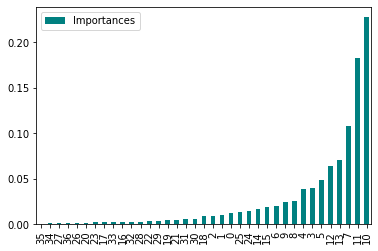

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

final_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances": importances})
final_df.set_index("Importances")

final_df = final_df.sort_values('Importances')

final_df.plot.bar(color="teal");

In [27]:
print(importances)

[1.19827344e-02 9.96767636e-03 9.39543567e-03 4.00323655e-02
 3.82710326e-02 4.80726972e-02 1.93991672e-02 1.08407468e-01
 2.50767756e-02 2.47512241e-02 2.27950599e-01 1.82587650e-01
 6.33523315e-02 7.10470067e-02 1.66611133e-02 1.85644751e-02
 2.26831268e-03 1.88496127e-03 8.40547372e-03 4.21394557e-03
 1.57191591e-03 4.38064702e-03 3.48099561e-03 1.76456792e-03
 1.47810926e-02 1.35361712e-02 1.52861992e-03 1.48327822e-03
 2.79008115e-03 3.75231611e-03 5.97286091e-03 5.86549760e-03
 2.40010761e-03 2.06673816e-03 6.21211407e-04 1.83364992e-04
 1.52808785e-03]


Sebelum feature selection  (10311, 37)
Setelah feature selection  (10311, 31)


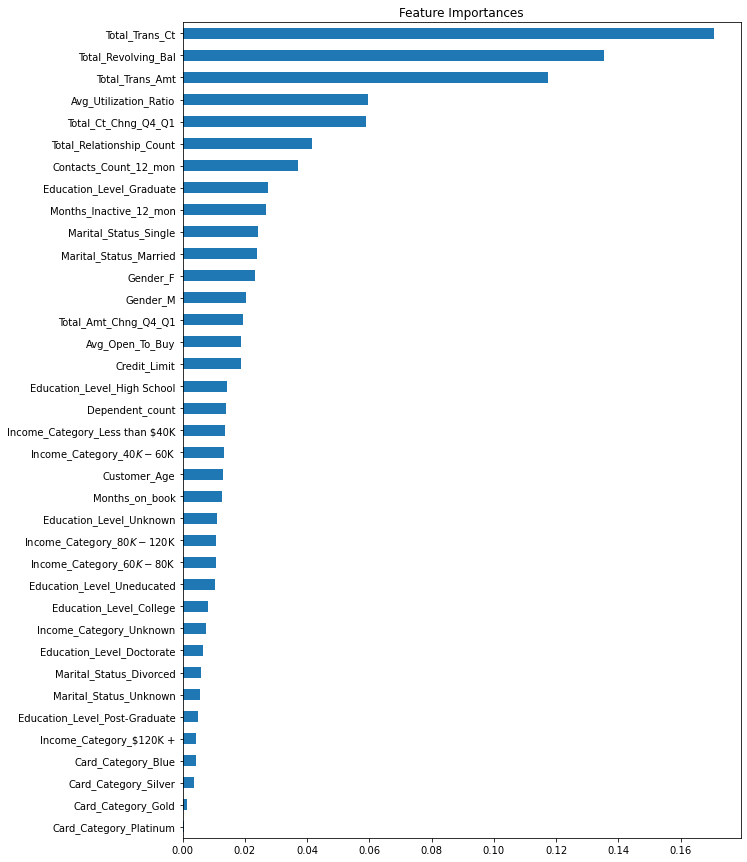

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np

clf = ExtraTreesClassifier(random_state=2)
clf = clf.fit(X_train, y_train)
embed = SelectFromModel(clf, prefit=False, threshold=0.005)
embed.fit(X_train, y_train)
X_train_new = embed.transform(X_train)
X_test_new = embed.transform(X_test)

print('Sebelum feature selection ', X_train.shape)
print('Setelah feature selection ', X_train_new.shape)

df_x = df.drop(columns=['Attrition_Flag'])

feat_importances = pd.Series(clf.feature_importances_, index=df_x.columns)
feat_importances = feat_importances.sort_values()
feat_importances.plot(kind='barh', figsize=(10, 15))
plt.title('Feature Importances')
plt.show()

# 04 - Modelling 

In [29]:
# Cross K Validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support

def evaluate_model(model, X_test, y_test):
  y_pred = cross_val_predict(model, X_test, y_test, cv=5)
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))
  print("Accuracy Score: ", accuracy_score(y_test, y_pred))
  print("Precision Score: ", precision_score(y_test, y_pred))
  sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
  print('Specificity : ',spec)
  print("Recall Score: ", recall_score(y_test, y_pred))
  print('Plot Confusion Matrix :')
  plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,values_format='.0f')  


## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[[ 181  141]
 [  60 1515]]
ROC AUC Score:  0.762008281573499
Accuracy Score:  0.8940432261465472
Precision Score:  0.9148550724637681
Specificity :  0.762008281573499
Recall Score:  0.9619047619047619
Plot Confusion Matrix :


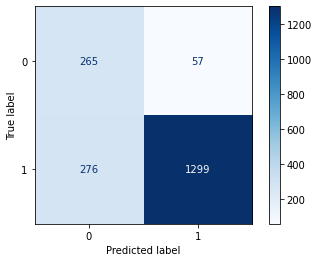

In [31]:
evaluate_model(lr, X_test, y_test)

# SVC 

In [32]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[ 146  176]
 [  25 1550]]
ROC AUC Score:  0.7187715665976535
Accuracy Score:  0.8940432261465472
Precision Score:  0.8980301274623407
Specificity :  0.7187715665976535
Recall Score:  0.9841269841269841
Plot Confusion Matrix :


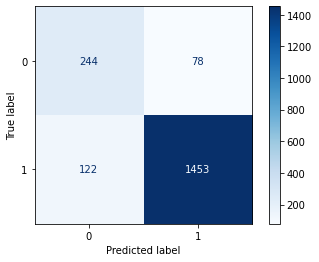

In [33]:
evaluate_model(svm, X_test, y_test)

## KNN (K - Nearest Neighbors)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

[[  60  262]
 [  29 1546]]
ROC AUC Score:  0.5839613526570049
Accuracy Score:  0.8465998945703743
Precision Score:  0.8550884955752213
Specificity :  0.5839613526570048
Recall Score:  0.9815873015873016
Plot Confusion Matrix :


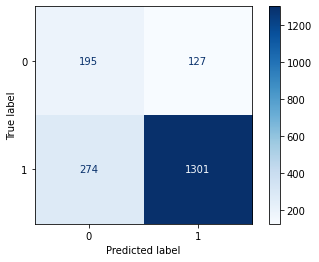

In [35]:
evaluate_model(knn, X_test, y_test)

## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[[ 247   75]
 [  82 1493]]
ROC AUC Score:  0.8575086266390614
Accuracy Score:  0.9172377438060095
Precision Score:  0.9521683673469388
Specificity :  0.8575086266390615
Recall Score:  0.947936507936508
Plot Confusion Matrix :


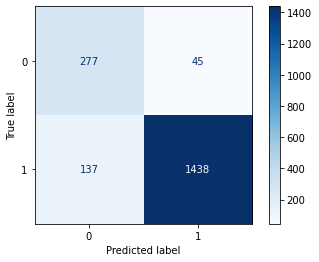

In [37]:
evaluate_model(dt, X_test, y_test)

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

[[ 239   83]
 [  43 1532]]
ROC AUC Score:  0.8574672187715665
Accuracy Score:  0.933579335793358
Precision Score:  0.9486068111455108
Specificity :  0.8574672187715666
Recall Score:  0.9726984126984127
Plot Confusion Matrix :


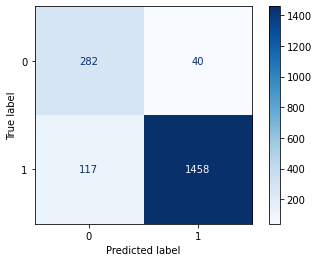

In [39]:
evaluate_model(rf, X_test, y_test)

## XG Boost

In [40]:
from xgboost import XGBClassifier

# fit model on training data
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

[[ 265   57]
 [  25 1550]]
ROC AUC Score:  0.9035541752933057
Accuracy Score:  0.9567738534528203
Precision Score:  0.9645301804604853
Specificity :  0.9035541752933057
Recall Score:  0.9841269841269841
Plot Confusion Matrix :


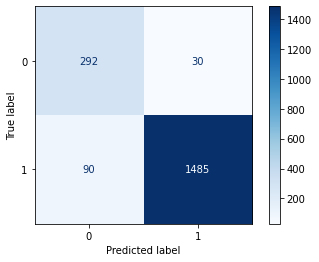

In [41]:
evaluate_model(xgb, X_test, y_test)

## Light GBM

In [42]:
# build the lightgbm model
import lightgbm as lgb

gbm = lgb.LGBMClassifier()
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

[[ 265   57]
 [  24 1551]]
ROC AUC Score:  0.9038716356107659
Accuracy Score:  0.9573010015814444
Precision Score:  0.9645522388059702
Specificity :  0.9038716356107661
Recall Score:  0.9847619047619047
Plot Confusion Matrix :


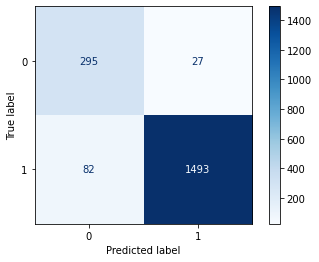

In [43]:
evaluate_model(gbm, X_test, y_test)

## Light GBM after Feature Selection

In [61]:
# build the lightgbm model
import lightgbm as lgb

gbm = lgb.LGBMClassifier(learning_rate = 0.22, max_depth = 9, n_estimators = 200, num_leaves = 40)
gbm.fit(X_train_new, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.22, max_depth=9,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=40, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

[[ 272   50]
 [  22 1553]]
ROC AUC Score:  0.915376121463078
Accuracy Score:  0.9620453347390617
Precision Score:  0.9688084840923269
Specificity :  0.915376121463078
Recall Score:  0.986031746031746
Plot Confusion Matrix :


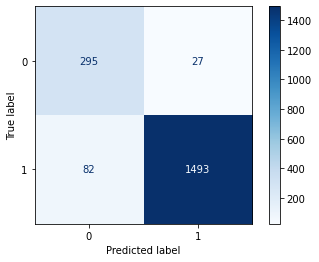

In [62]:
evaluate_model(gbm, X_test_new, y_test)

In [101]:
# build the lightgbm model
import lightgbm as lgb

gbm = lgb.LGBMClassifier(learning_rate=0.22, max_depth=3, n_estimators=150, num_leaves=40)
gbm.fit(X_train_new, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.22, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=150, n_jobs=-1, num_leaves=40, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

[[ 277   45]
 [  24 1551]]
ROC AUC Score:  0.9225051759834368
Accuracy Score:  0.9636267791249341
Precision Score:  0.9718045112781954
Specificity :  0.9225051759834368
Recall Score:  0.9847619047619047
Plot Confusion Matrix :


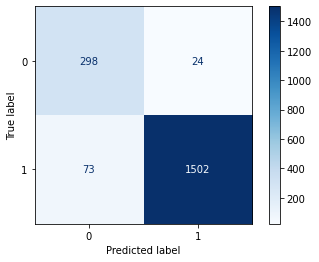

In [102]:
evaluate_model(gbm, X_test_new, y_test)

# 05 - Hyperparameter Tuning

## Light GBM

In [48]:
params = {
    'max_depth':[3,5,7,9,'max'],
    'n_estimators': [75, 100, 150, 200, 300],
    'num_leaves': [25, 35, 40],
    'learning_rate': [0.01, 0.2]
    }

In [49]:
gbm_grid = lgb.LGBMClassifier()

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=gbm_grid,
             param_grid=params,
             scoring = 'roc_auc',
             n_jobs = -1,
             cv = 3,
             verbose=2
            )

In [50]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  4.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.2],
                         'max_depth': [3,

In [51]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'num_leaves': 35}

# 06 - Evaluation

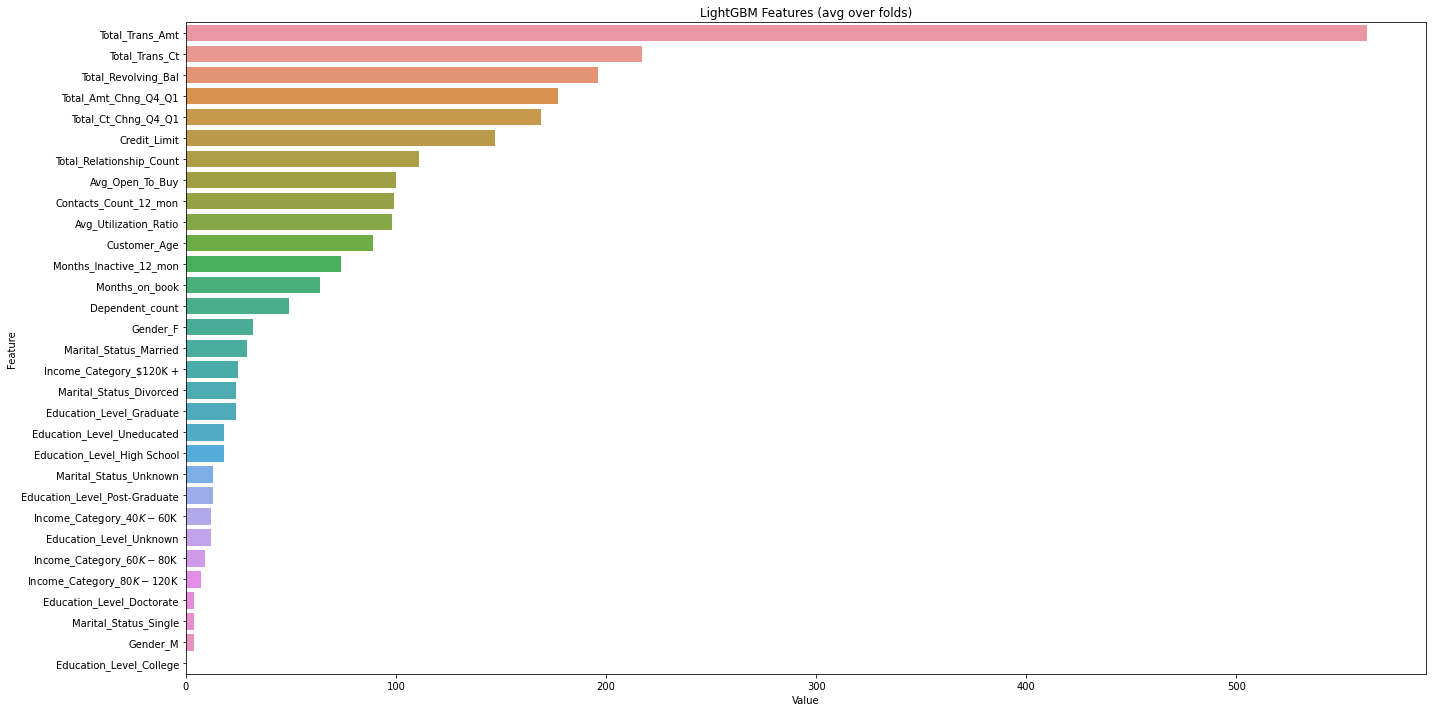

<Figure size 432x288 with 0 Axes>

In [52]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')